In [2047]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2048]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
from pathlib import Path
from typing import Tuple, List, Optional, Union, Tuple, Text
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import seaborn as sns
import datetime
from itertools import permutations
import heapq
import csv
from string import punctuation
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
# nltk.download()
nltk.download('omw-1.4')
stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import random
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

[nltk_data] Downloading package omw-1.4 to /home-
[nltk_data]     students/amghad/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home-
[nltk_data]     students/amghad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home-
[nltk_data]     students/amghad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2049]:
def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        
        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text

In [2050]:
# I used the code that coded here: https://www.kaggle.com/aditiani/analyzing-chatbot

contractions_dict = {     
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
"don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
"he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I had", "I'd've": "I would have",
"I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it will", "it'll've": "iit will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
"o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
"sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that had", "that'd've": "that would have",
"that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is", "they'd": "they had",
"they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are",
"they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had", "we'd've": "we would have",
"we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
"when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
"who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
"why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
"you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def expand_contraction(text, contraction_dict):
    contraction_pattern = re.compile('({})'.format('|'.join(contraction_dict.keys())), flags= re.IGNORECASE | re.DOTALL)
    
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_dict.get(match) \
            if contraction_dict.get(match) \
            else contraction_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        
        return expanded_contraction
        
    expanded_text = contraction_pattern.sub(expand_match, text)
    expanded_text = re.sub("'","", expanded_text)
    
    return expanded_text

def main_contraction(text: str) -> str:
    text = expand_contraction(text, contractions_dict)
    
    return text

In [2051]:
def to_lower(text: str) -> str:
    return text.lower()

In [2052]:
def remove_number(text: str) -> str:
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [2053]:
def to_strip(text: str) -> str:
    # return " ".join([c for c in text.split() if len(c)>2])    
    return " ".join([c for c in text.split()])

In [2054]:
def remove_char(text: str) -> str:
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

In [2055]:
def remove_duplicate(text: str) -> str:
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [2056]:
def remove_stopwords(text: str) -> str:
    stop_words = stopwords.words('english')
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [2057]:
wordnet_lemma = WordNetLemmatizer()

def lemma(text: str) -> str:
    lemmatize_words = [wordnet_lemma.lemmatize(word, 'v') for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [2058]:
# Remove the punctuations
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [2059]:
# Split identifier names, such as: camelCase, under_scores, dot.notation
def identifier_converter(text: str) -> str:
    text = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', text)
    text = re.sub('__([A-Z])', r'_\1', text)
    text = re.sub('([a-z0-9])([A-Z])|([A-Z])([a-z0-9])', r'\1_\2', text)
    text = re.sub(r"_|\.", " ", text)
    return re.sub(r"\s+", " ", text).lower()

In [2060]:
def change_punc_space(text: str) -> str:
    for character in punctuation:
        text = text.replace(character, ' ')
    return text

In [2061]:
def remove_punct_2(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [2062]:
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

In [2063]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [2064]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [2065]:
# Import the dataset as a dataframe
data_set = pd.read_csv('language-identification-datasets.csv')

# Separate input data into two groups: with and w/o label
data_wo_label = data_set[data_set.Language.isnull()]
data_w_label = data_set[~data_set.Language.isnull()]

display(data_wo_label.head(1))
display(data_w_label.head(1))

,Text,Language,ID
24326,[6] Encyclopædia Britannica Inc. şirketi ise ansiklopedilerindeki maddelerin ödül kazanmış ünlü akademisyenler tarafından hazırlandığını belirterek bu araştırmayı hatalı bulmuştur.,NaN,7823


,Text,Language,ID
0,şirket icra kurulu başkanı melih abdülhayoğlu tarafından birleşik krallıkta yılında kurulmuştur yılında şirket amerika birleşik devletlerine taşınmıştır comodo bilgisayar ve internet güvenliği üzerine odaklanmıştır şirket ssl sertifikalarını veren bir sertifika yetkilisi olarak etkinlik göstermektedir şahılar ve kurumlar için uç nokta network ve sınırı koruyan siber güvenlik güvenlik çözümleri sunmaktadır,Turkish,26110


Value Counts of Language Label

In [2066]:
data_w_label.Language.value_counts()

English       1877
French        1596
Spanish       1418
Russian       1329
Dutch         1226
Arabic        1190
Turkish       1170
Tamil         1156
Hindi          842
Japanese       824
Korean         795
Indonesian     794
Chinese        791
Swedish        788
Urdu           787
Pushto         786
Portugese      785
Latin          784
Persian        784
Thai           770
Estonian       768
Romanian       762
Italian        537
Malayalam      452
German         379
Danish         342
Kannada        301
Greek          293
Name: Language, dtype: int64

## Text Preprocessing

### Tokenization:

In the preprocessing section, we drop duplicate observations from the data frame and make sure all data have a string format, furthermore prepare the data frame for the next step.

In [2067]:
# Make sure all the elements are string
df_result = data_w_label.applymap(str)

# Notice: strip() function will remove leading and trailing whitespaces.
df_result['Language'] = df_result['Language'].apply(lambda x: x.strip())

In [2068]:
# Extract message length
df_result['Text_length'] = df_result['Text'].apply(lambda x: len(x))

In [2069]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [2070]:
def my_remove(text):
    """
        Remove the punctuation
    """
    text = re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", text)
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', '', text) 
    text = re.sub(r'。×—— —”’“………«–»—…………«»→،°¿„”٫٪ء؛,«《》，', "", text) 
    return text

In [2071]:
# df_result.drop(['prep1', 'prep2', 'prep3', 'prep4', 'prep5', 'prep6', 'prep7', 'prep8'], axis=1, inplace=True)

In [2072]:
pd.options.display.max_colwidth = 500
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#  pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [2073]:
# df_result.to_csv("/content/drive/MyDrive/check1.csv")
# df_result[["Text", "prep26"]]
# df_result.tail(5)[["Text", "prep8"]]

In [2074]:
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text

In [2075]:
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text
        # return text.lower()

In [2076]:
def my_test_removeEnglishLetters(text):
    if len(text) == 0:
        return text        
    # text_new = re.sub(r'[a-zA-Z]+', '', text)
    text_new = re.sub(r'\s*[A-Za-z]+\b', '' , text)
    text_new = text_new.rstrip()
    per_remain = 100*len(text_new)/len(text)
    
    if per_remain > 55:
        return text_new
    else:
        return text

def my2_test_removeEnglishLetters(text):
    output = re.sub(r'\s*[A-Za-z]+\b', '' , text)
    return output.rstrip()

def my_arabic(text):
    # return re.sub(r"[^.,&&[\\P{InArabic}\\p{P}\\p{Digit}]]+", '', text)
    return re.sub(r"[^.,&&[\\P{InArabic}\\p{P}\\p{Digit}]]+", '', text)

def my_punc(text):
    # importing a string of punctuation and digits to remove
    import string
    exclist = string.punctuation + string.digits
    # remove punctuations and digits from oldtext
    table_ = str.maketrans('', '', exclist)
    return text.translate(table_)

In [2077]:
# Make sure all the elements are string
df_result = data_w_label.applymap(str)

# Notice: strip() function will remove leading and trailing whitespaces.
df_result['prep23'] = df_result.apply(lambda row: main_contraction(row["Text"]) if row["Language"]=="English" else row["Text"], axis=1)
df_result['prep4'] = df_result['prep23'].apply(change_punc_space)
df_result['prep5'] = df_result['prep4'].apply(to_strip)
df_result['prep3'] = df_result['prep5'].apply(remove_number)
# df_result['prep8'] = df_result['prep3'].apply(remove_stopwords)
df_result['prep9'] = df_result['prep3'].apply(my_remove)
df_result['prep18'] = df_result['prep9'].apply(my_arabic)
df_result['prep10'] = df_result['prep18'].apply(my_punc)
df_result['prep118'] = df_result['prep10'].apply(my_test_removeEnglishLetters)
df_result['prep8'] = df_result.apply(lambda row: remove_emoji(row["prep118"]) if row["Language"]=="English" else row["prep118"], axis=1)

df_result['prep26'] = df_result.apply(lambda row: remove_char(row["prep8"]) if row["Language"]=="English" else row["prep8"], axis=1)
df_result['prep22'] = df_result.apply(lambda row: to_lower(row["prep26"]) if row["Language"]=="English" else row["prep26"], axis=1)
df_result['prep25'] = df_result.apply(lambda row: remove_duplicate(row["prep22"]) if row["Language"]=="English" else row["prep22"], axis=1)
# df_result['prep27'] = df_result.apply(lambda row: lemma(row["prep25"]) if row["Language"]=="English" else row["prep25"], axis=1)
df_result['prep26'] = df_result.apply(lambda row: other_clean(row["prep25"]) if row["Language"]=="English" else row["prep25"], axis=1)

df_result['prep28'] = df_result.apply(lambda x: my_test_removeEnglishLetters(x.prep25) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic', "Persian", "Urdu", "Pushto", "Chinese", "Korean", "Tamil"]  else x.prep25, axis = 1)
# df_result['prep28'] = df_result['prep27'].apply(removeSymbolsAndNumbers)

In [2078]:
y = df_result['Language']

In [2079]:
# df_result[df_result['Language']=="Japanese"].sample(10)

In [2080]:
# df_result[["Language", 'prep28', 'Text']].sample(10)

## Making Model (1)

In [2081]:
x_train, x_test, y_train, y_test = train_test_split(df_result['prep28'], y, random_state=42, test_size=0.30, shuffle=True)

In [2082]:
# x_train.Language.value_counts()

In [2083]:
# x_test.Language.value_counts()

In [2084]:
vectorizer = TfidfVectorizer(ngram_range=(1, 4), analyzer='char')

In [2085]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.svm import LinearSVC

classifier = naive_bayes.MultinomialNB()

model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LinearSVC())
])
# ('clf', LogisticRegression())

In [2086]:
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 4))),
                ('clf', LinearSVC())])

## Checking for Accuracy

In [2087]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1_v1 = f1_score(y_test, y_pred, average='macro')
f1_v2 = f1_score(y_test, y_pred, average='weighted')
f1_v3 = f1_score(y_test, y_pred, average='micro')
cm = confusion_matrix(y_test, y_pred)

In [2088]:
print("Accuracy is :", accuracy)
print("F1 is :", f1_v1)
print("F1 is :", f1_v2)
print("F1 is :", f1_v3)

Accuracy is : 0.9868457111537408
F1 is : 0.9886685458234281
F1 is : 0.9869898299211517
F1 is : 0.9868457111537408


In [2089]:
dd = pd.DataFrame()
dd["x_test"] = x_test
dd["y_test"] = y_test
dd["predict"] = y_pred

In [2090]:
jj = dd[dd["y_test"] != dd["predict"]]
ffj = jj[(jj["predict"]=="English")&(jj["y_test"]=="Latin")]
print(ffj.shape)
ffj

(10, 3)


,x_test,y_test,predict
1227,ho karen disciplining investment bankers disciplining the economy wall street’s institutional culture of crisis and the downsizing of american corporations american anthropologist,Latin,English
1087,gardner al order paucituberculata in wilson de reeder dm eds mammal species of the world second edition smithsonian institution press washington and london,Latin,English
16720,davy j i m et d nurse synchronic versions of dahls law the multiple applications of a multiple dissimilation rule journal of african languages and linguistics –,Latin,English
7703,herren m w the hisperica famina ii related poems a critical edition with english translation and philological commentary toronto pontifical institute of mediaeval studies editio imperfecta,Latin,English
5359,mccreery c the maple leaf and the white cross a history of st john ambulance and the most venerable order of the hospital of st john of jerusalem in canada anglice,Latin,English
7228,pollington s leechcraft early english charms plantlore and healing hockwold cum wilton norfolk anglo saxon books editio imperfecta,Latin,English
12599,todd whitelaw feasts of clay ceramics and feasting at early minoan myrtos fournou korifi in y galanakis t wilkinson j bennet edd aθymata criticalessays on the archaeology of the eastern mediterranean in honour of e susan sherratt oxoniae archaeopress pp w,Latin,English
16570,hsiao kung chuan a modern china and a new world k ang yu wei reformer and utopian seattli et londinii university of washington press,Latin,English
18911,allitt john stewart donizetti—in the light of romanticism and the teaching of johann simon mayr shaftesbury dorset uk element books,Latin,English
4456,meaney a l variant versions of old english medical remedies and the compilation of balds leechbook anglo saxon england pp –,Latin,English


In [2091]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       341
     Chinese       0.98      0.98      0.98       239
      Danish       0.99      0.99      0.99        99
       Dutch       0.99      0.98      0.99       385
     English       0.90      1.00      0.95       527
    Estonian       1.00      0.97      0.98       241
      French       0.99      0.99      0.99       470
      German       0.97      0.99      0.98       115
       Greek       1.00      1.00      1.00        88
       Hindi       1.00      0.98      0.99       254
  Indonesian       0.99      0.99      0.99       236
     Italian       0.98      0.98      0.98       170
    Japanese       1.00      0.99      1.00       239
     Kannada       1.00      1.00      1.00       106
      Korean       1.00      0.98      0.99       257
       Latin       0.98      0.95      0.96       240
   Malayalam       1.00      1.00      1.00       143
     Persian       1.00    

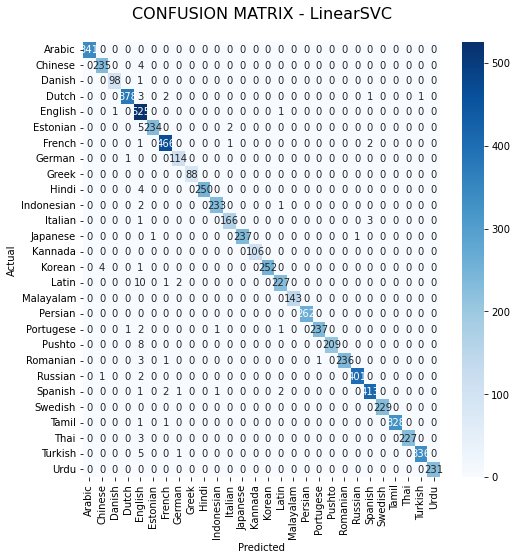

In [2092]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=np.unique(df_result.Language.values), 
            yticklabels=np.unique(df_result.Language.values))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [2093]:
# plt.figure(figsize=(15,10))
# sns.heatmap(cm, annot = True)
# plt.show()

In [2094]:
# Make sure all the elements are string
df_result_2 = data_wo_label.applymap(str)

# Notice: strip() function will remove leading and trailing whitespaces.
# df_result_2['prep23'] = df_result_2.apply(lambda row: main_contraction(row["Text"]) if row["Language"]=="English" else row["Text"], axis=1)
df_result_2['prep4'] = df_result_2['Text'].apply(change_punc_space)
df_result_2['prep5'] = df_result_2['prep4'].apply(to_strip)
df_result_2['prep3'] = df_result_2['prep5'].apply(remove_number)
df_result_2['prep8'] = df_result_2['prep3'].apply(remove_stopwords)
df_result_2['prep9'] = df_result_2['prep8'].apply(my_remove)
df_result_2['prep18'] = df_result_2['prep9'].apply(my_arabic)
# df_result_2['prep10'] = df_result_2['prep8'].apply(my_punc)
df_result_2['prep28'] = df_result_2['prep18'].apply(my_test_removeEnglishLetters)
# df_result['prep8'] = df_result_2.apply(lambda row: remove_emoji(row["prep118"]) if row["Language"]=="English" else row["prep118"], axis=1)

# df_result['prep26'] = df_result.apply(lambda row: remove_char(row["prep8"]) if row["Language"]=="English" else row["prep8"], axis=1)
# df_result['prep22'] = df_result.apply(lambda row: to_lower(row["prep26"]) if row["Language"]=="English" else row["prep26"], axis=1)
# df_result['prep25'] = df_result.apply(lambda row: remove_duplicate(row["prep22"]) if row["Language"]=="English" else row["prep22"], axis=1)
# df_result['prep27'] = df_result.apply(lambda row: lemma(row["prep25"]) if row["Language"]=="English" else row["prep25"], axis=1)
# df_result['prep26'] = df_result.apply(lambda row: other_clean(row["prep27"]) if row["Language"]=="English" else row["prep27"], axis=1)

# df_result['prep27'] = df_result.apply(lambda x: my_test_removeEnglishLetters(x.prep26) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic', "Persian", "Urdu", "Pushto", "Chinese", "Korean", "Tamil"]  else x.prep26, axis = 1)
# df_result_2['prep28'] = df_result_2['prep118'].apply(removeSymbolsAndNumbers)

In [2096]:
y_pred_unseen = model.predict(df_result_2['prep28'])

In [ ]:
hh = data_set[data_set.Language.isnull()]


In [ ]:
# hh.sample(20)
df_result_2['predict_new'] = y_pred_unseen
df_result_2[["prep10", "predict_new"]].head()

In [ ]:
# df_result_2[['Text', 'prep28', "Language"]].sample(20)

In [ ]:
# января cómo te va


In [2097]:
data_set.loc[data_set.Language.isnull(), 'Language'] = y_pred_unseen

In [2098]:
data_set.to_csv("Ch1-best.csv")